In [14]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

def normalize_arr(alist):
    arr = np.array(alist)

    # 计算最小值和最大值
    min_val = np.min(arr)
    max_val = np.max(arr)

    # 将数组归一化到 [0, 1] 范围
    normalized_arr = (arr - min_val) / (max_val - min_val)
    
    return normalized_arr.tolist()

# Set data
df = pd.DataFrame({
    'group': ['DRV', 'SDSD', 'DID', 'BVI-RLV (ours)'],
    'STA-SUNet': [14.19, 16.93, 19.61, 20.64],
    'SwinIR': [15.22, 11.0, 11.58, 17.54],
    'mo-CGAN': [15.84, 14.25, 15.87, 17.41],
    'EDVR': [15.73, 16.20, 19.53, 20.12],
    'SMOID-Net': [17.66, 14.92, 17.62, 17.98],
    # 'SDSD-Net': [16.31, 16.31, 19.05, 18.05],
    'BVI-CDM': [19.56, 21.00, 19.44, 22.20],
    'PCDUNet': [15.0, 17.07, 18.91, 19.50],
})


# 提取要归一化的数据，即除了 'group' 列以外的所有列
cols_to_normalize = df.columns.difference(['group'])
# # 对每一行进行归一化操作
df_norm = df.copy()  # 复制数据框以免修改原始数据
# # 对每一行进行归一化
df_norm[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df2 = pd.DataFrame({
    'group': ['DRV', 'SDSD', 'DID', 'BVI-RLV (ours)'],
    'STA-SUNet': [0.424, 0.608, 0.714, 0.765],
    'SwinIR': [0.707, 0.436, 0.588, 0.733],
    'mo-CGAN': [0.456, 0.431, 0.512, 0.557],
    'EDVR': [0.598, 0.640, 0.701, 0.756],
    'SMOID-Net': [0.541, 0.501, 0.554, 0.621],
    # 'SDSD-Net': [0.587, 0.587, 0.652, 0.690],
    'BVI-CDM':[0.575, 0.746, 0.683, 0.773],
    'PCDUNet': [0.492, 0.677, 0.725, 0.757],
})
 
# 提取要归一化的数据，即除了 'group' 列以外的所有列
cols_to_normalize = df2.columns.difference(['group'])
# # 对每一行进行归一化操作
df2_norm = df2.copy()  # 复制数据框以免修改原始数据
# # 对每一行进行归一化
df2_norm[cols_to_normalize] = scaler.fit_transform(df2[cols_to_normalize])

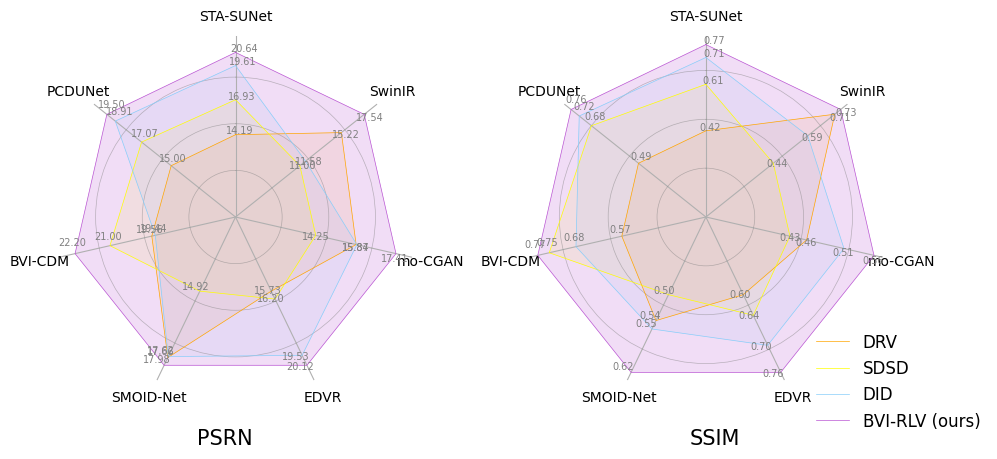

In [21]:

# ---------- 步骤1 创建背景
# number of variable
# 变量类别
categories = list(df)[1:]
# 变量类别个数
N = len(categories)
 
# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
# 初始化极坐标网格
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), subplot_kw=dict(polar=True))

# 第一个子图
ax1.set_theta_offset(pi / 2)
ax1.set_theta_direction(-1)
plt.sca(ax1)
plt.xticks(angles[:-1], categories)
ax1.set_rlabel_position(0)
ax1.spines['polar'].set_visible(False)
ax1.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
plt.ylim(-0.2, 1.2)
ax1.set_yticks(np.linspace(-1, 0.7, num=4), ['', '', "", ""], color="grey", size=7)
ax1.yaxis.set_tick_params(width=0)  

colors = ['orange', 'yellow', '#87CEFA', '#BA55D3']
for i in range(len(df)):
    group_name = df.loc[i][0]
    values = df.loc[i].drop('group').values.flatten().tolist()
    norm_v = df_norm.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    norm_v += norm_v[:1]
    ax1.plot(angles, norm_v, color=colors[i], linewidth=0.5, linestyle='solid', label=group_name)
    for j, value in enumerate(values[:-1]):
        angle = angles[j]
        ax1.text(angle + 0.05, norm_v[j]+0.01, "{:.2f}".format(value), color='grey', fontsize=7, ha='center')
    alpha = 0.1 if i != len(df)-1 else 0.2
    ax1.fill(angles, norm_v, colors[i], alpha=alpha)

# 第二个子图
ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)
plt.sca(ax2)
plt.xticks(angles[:-1], categories)
ax2.set_rlabel_position(0)
ax2.spines['polar'].set_visible(False)
ax2.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
plt.ylim(-0.2, 1.1)
ax2.set_yticks(np.linspace(-1, 0.7, num=4), ['', '', "", ""], color="grey", size=7)
ax2.yaxis.set_tick_params(width=0)  

colors = ['orange', 'yellow', '#87CEFA', '#BA55D3']
for i in range(len(df2)):
    group_name = df2.loc[i][0]
    values = df2.loc[i].drop('group').values.flatten().tolist()
    norm_v = df2_norm.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    norm_v += norm_v[:1]
    ax2.plot(angles, norm_v, color=colors[i], linewidth=0.5, linestyle='solid', label=group_name)
    for j, value in enumerate(values[:-1]):
        angle = angles[j]
        ax2.text(angle + 0.05, norm_v[j]+0.01, "{:.2f}".format(value), color='grey', fontsize=7, ha='center')
    alpha = 0.1 if i != len(df2)-1 else 0.2
    ax2.fill(angles, norm_v, colors[i], alpha=alpha)

# 添加图例
# 在第一个子图底部添加标签
fig.text(0.23, 0.13, 'PSRN', ha='center', va='center', fontsize=15)
# 在第二个子图底部添加标签
fig.text(0.72, 0.13, 'SSIM', ha='center', va='center', fontsize=15)
plt.subplots_adjust(wspace=0.3) 
plt.legend(loc='lower right', bbox_to_anchor=(1.3, -0.13), frameon=False, fontsize='large')
fig.tight_layout()
plt.savefig('Radar.pdf', format='pdf', dpi=300)
plt.show()